In [11]:
import pandas as pd
from datetime import datetime
from matplotlib import pyplot
from pylab import rcParams
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv('../data/datasets/onemonth_nodeload15.csv')
#df.set_index('ds',inplace=True)
print(df.head(5))
print(df.tail(5))
print(df.describe())
print(df.dtypes)
print(len(df['y']))

                    ds     y
0  13/05/2024 00:00:00  6.53
1  13/05/2024 00:00:05  6.53
2  13/05/2024 00:00:10  6.53
3  13/05/2024 00:00:15  6.52
4  13/05/2024 00:00:20  6.52
                         ds    y
532706  13/06/2024 23:59:40  2.6
532707  13/06/2024 23:59:45  2.6
532708  13/06/2024 23:59:50  2.6
532709  13/06/2024 23:59:55  2.6
532710  14/06/2024 00:00:00  2.6
                   y
count  532711.000000
mean        4.380956
std         2.186642
min         1.090000
25%         2.230000
50%         4.730000
75%         6.060000
max        10.500000
ds     object
y     float64
dtype: object
532711


<Axes: >

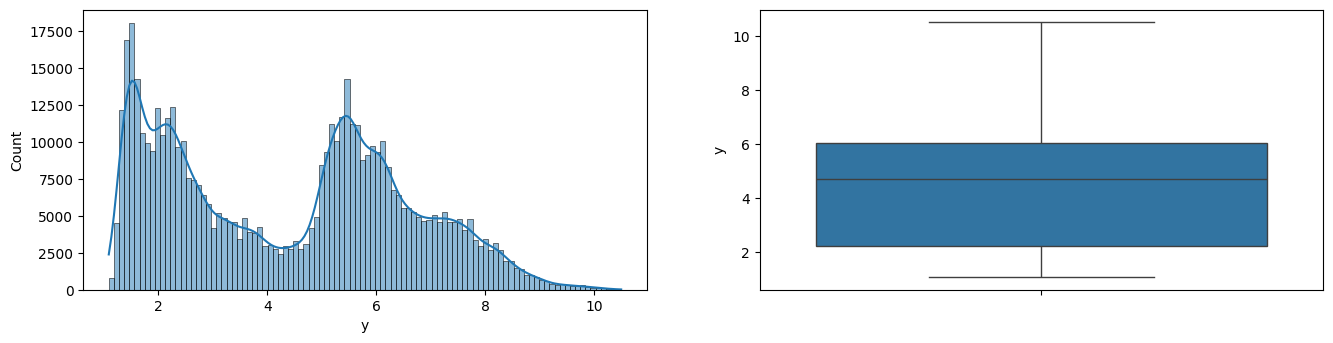

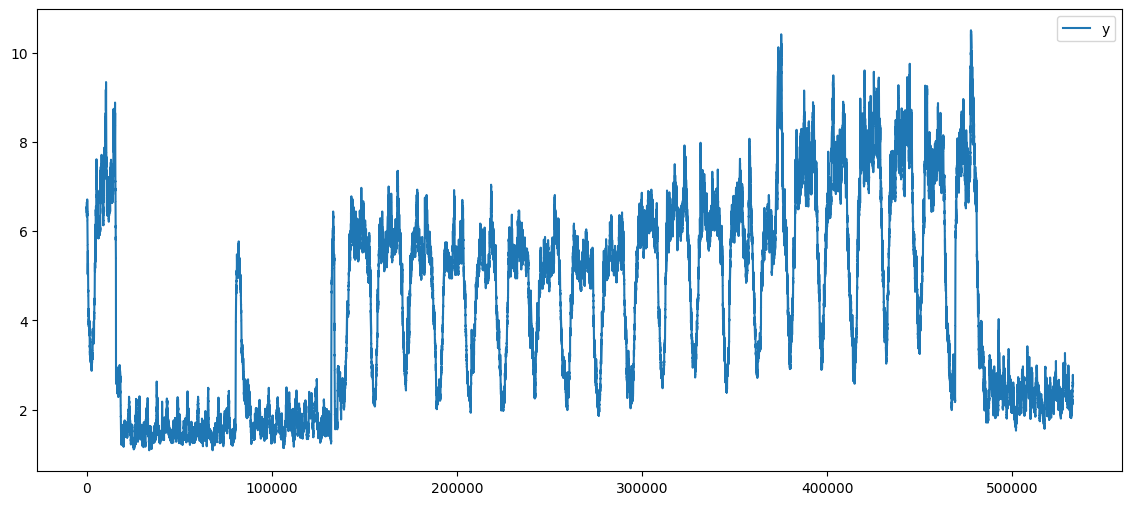

In [13]:
import seaborn as sns
plt.figure(figsize = (16,8))
plt.subplot(2,2,1)
sns.histplot(df['y'], kde=True)
plt.subplot(2,2,2)
sns.boxplot(data = df['y'])
df.plot(figsize=(14, 6))

In [14]:
#finding iqr, upper limit and lower limit
import numpy as np
q3, q1 = np.percentile(df['y'],[75,25])
iqr = q3-q1

upper_limit = q3 + 1.5*iqr
lower_limit = q1 - 1.5*iqr

print(f"iqr : {iqr}")
print(f"upper limit : {upper_limit}")
print(f"lower limit : {lower_limit}")

iqr : 3.8299999999999996
upper limit : 11.805
lower limit : -3.5149999999999992


In [15]:
#finding outliers

df[df['y']>upper_limit].count()

ds    0
y     0
dtype: int64

In [16]:
#Trimming

new_df = df[df['y'] <upper_limit]
print(new_df.describe())

                   y
count  532711.000000
mean        4.380956
std         2.186642
min         1.090000
25%         2.230000
50%         4.730000
75%         6.060000
max        10.500000


<Axes: ylabel='y'>

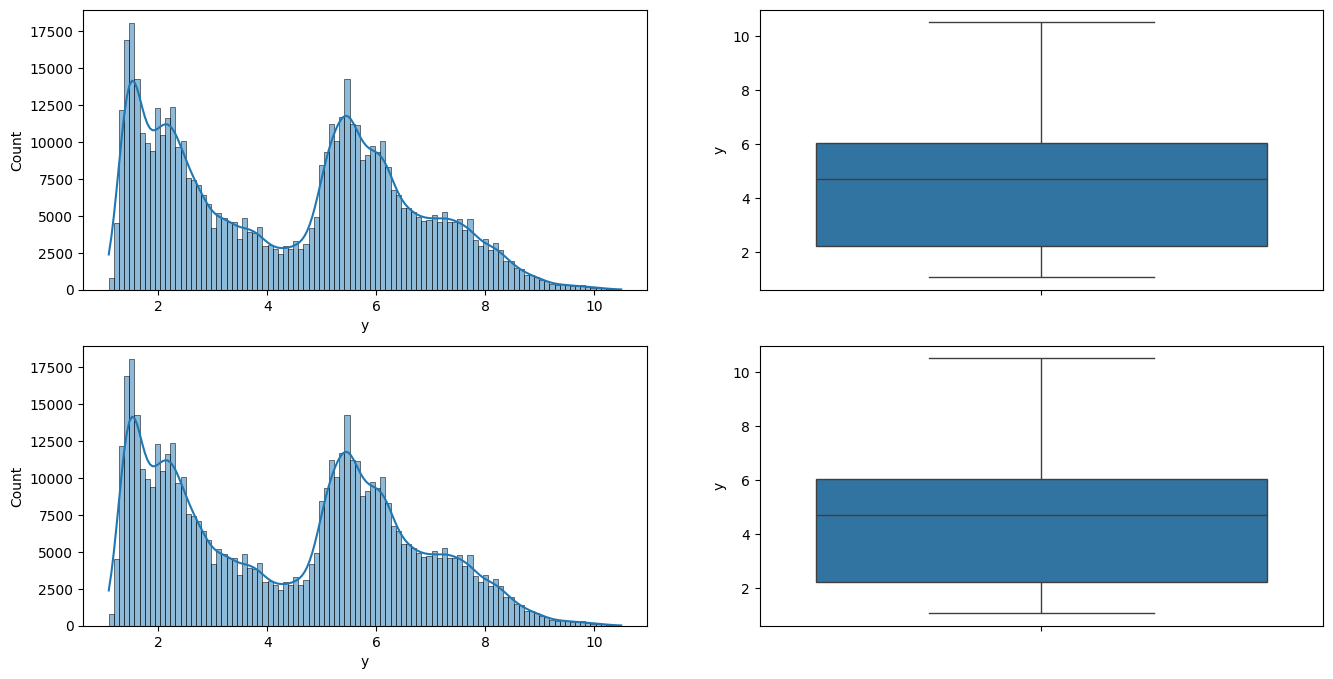

In [17]:
plt.figure(figsize = (16,8))

plt.subplot(2,2,1)
sns.histplot(df['y'], kde=True)
plt.subplot(2,2,2)
sns.boxplot(data = df['y'])

plt.subplot(2,2,3)
sns.histplot(new_df['y'], kde=True)
plt.subplot(2,2,4)
sns.boxplot(data = new_df['y'])

In [18]:
new_df.to_csv('../data/datasets/onemonthprocessed_nodeload15.csv', index=False)

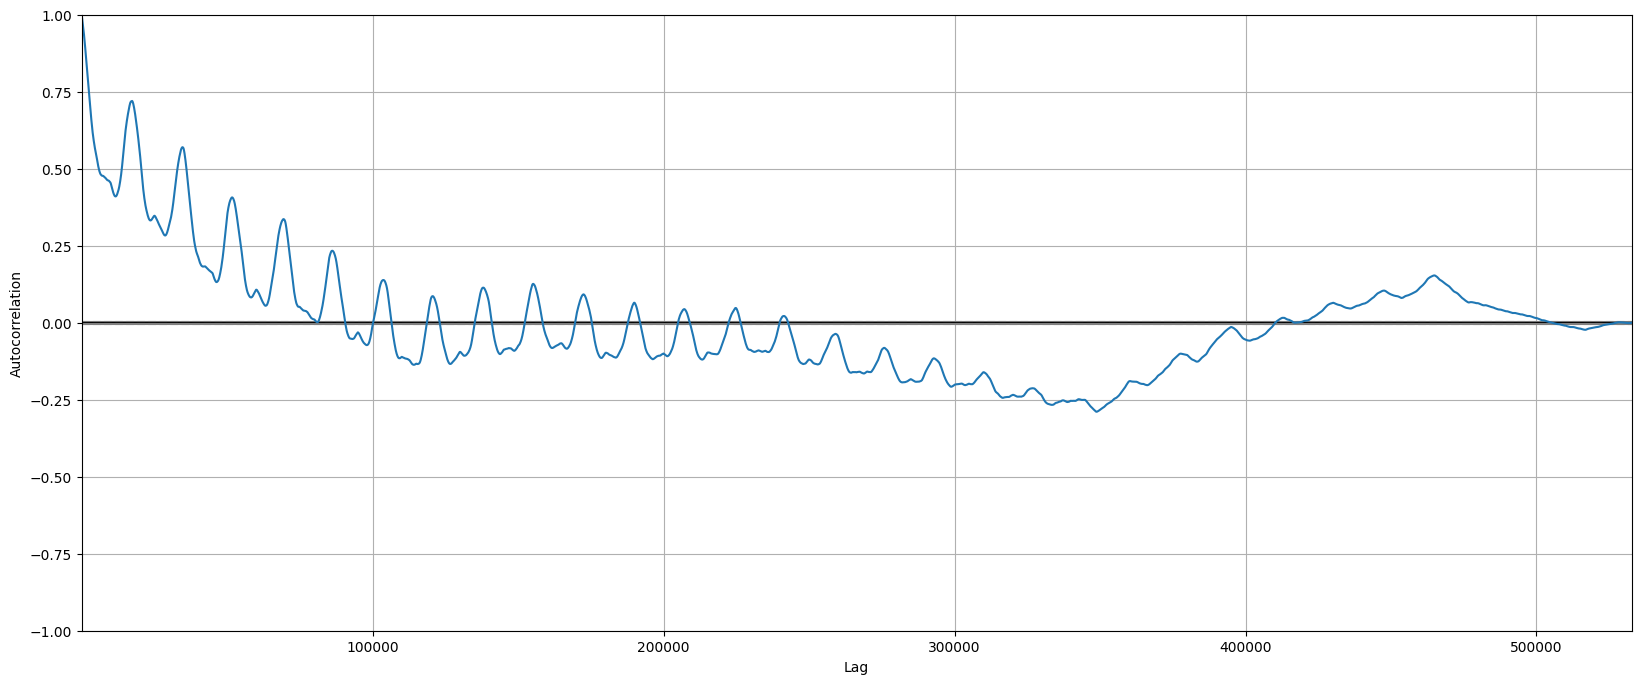

In [19]:
new_df.set_index('ds',inplace=True)
from pandas.plotting import autocorrelation_plot
plt.figure(figsize = (20,8))
autocorrelation_plot(new_df)
pyplot.show()